In [1]:
import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
from src import config, image_utils
from src.model.detected_object import DetectedObject
import imutils

In [2]:
ultralytics.checks()

Ultralytics YOLOv8.1.29 🚀 Python-3.11.8 torch-2.2.1 CPU (Apple M3)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 358.3/460.4 GB disk)


In [3]:
model = YOLO(config.YOLO_BASE_MODEL)

In [4]:
img = cv2.imread('./../datasets/images/model_preview/1.jpeg')
img = imutils.resize(img, width=1216)

In [5]:
results = model(img, device=config.YOLO_DEVICE)


0: 480x640 3 persons, 1 airplane, 4 trucks, 768.4ms
Speed: 3.2ms preprocess, 768.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [6]:
result = results[0]

In [7]:
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [8]:
bboxes = np.array(result.boxes.xyxy.cpu(), dtype=int)
classes = np.array(result.boxes.cls.cpu(), dtype=int)
centers = (bboxes[:, :2] + bboxes[:, 2:]) / 2

In [9]:
detected_objects = []
for bbox, class_id, center in zip(bboxes, classes, centers):
    detected_objects.append(DetectedObject(result.names[class_id], bbox, center))

In [10]:
image_utils.draw_bboxes(
    img, 
    detected_objects,
    config.BBOX_COLOR, 
    config.BBOX_CENTER_COLOR, 
    config.LINE_WIDTH
)

array([[[146,  91,  48],
        [147,  89,  54],
        [147,  87,  52],
        ...,
        [152,  99,  56],
        [145,  94,  50],
        [144,  94,  48]],

       [[142,  91,  36],
        [148,  93,  44],
        [148,  91,  47],
        ...,
        [150,  97,  53],
        [147,  95,  51],
        [151,  99,  54]],

       [[140,  97,  16],
        [144,  94,  28],
        [150,  95,  44],
        ...,
        [149,  94,  54],
        [149,  95,  55],
        [150,  96,  54]],

       ...,

       [[154, 157, 155],
        [151, 153, 153],
        [154, 156, 156],
        ...,
        [148, 145, 141],
        [148, 145, 142],
        [147, 142, 142]],

       [[152, 154, 154],
        [151, 153, 153],
        [152, 154, 154],
        ...,
        [151, 147, 143],
        [148, 145, 141],
        [146, 142, 142]],

       [[150, 152, 152],
        [152, 154, 154],
        [155, 157, 157],
        ...,
        [147, 144, 140],
        [147, 144, 140],
        [150, 145, 145]]

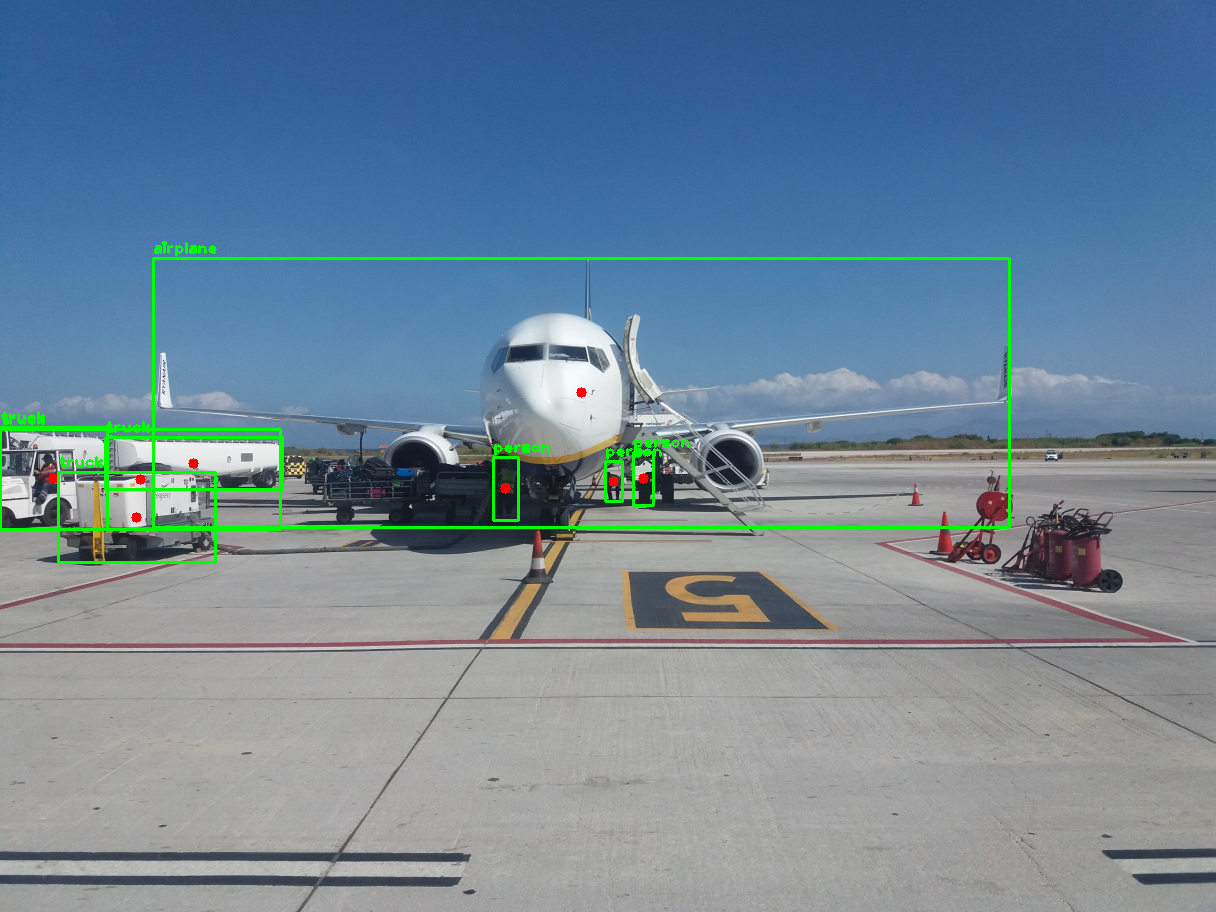

In [11]:
preview = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(preview))